네이버 뉴스 중 하나의 카테고리(경제_경제 일반) 페이지에서 뉴스 기사 링크 수집

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

# selenium으로 키를 조작하기 위한 import
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 페이지 로딩을 기다리는데에 사용할 time 모듈 import
import time

c:\Users\Master\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 진행 상황을 체크하기 위한 모듈
# 일단 생략
# !pip install tqdm 

In [16]:
# Chrome 브라우저 열기
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # 브라우저 창을 띄우지 않음
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [17]:
# 크롬드라이버 실행
# driver = webdriver.Chrome(options = options) 
driver = webdriver.Chrome()

#크롬 드라이버에 url 주소 넣고 실행
driver.get('https://www.google.co.kr/')

# 페이지가 완전히 로딩되도록 3초동안 기다림
time.sleep(3)

category
* 정치 : 100
* 경제 : 101
* 사회 : 102
* 생활/문화 : 103
* IT/과학 : 105
* 세계 : 104

detail_category
* 사회
    * 사건사고 : 249

In [18]:
# 사용자로부터 입력받기
category = input('카테고리를 입력하세요: ')
detail_category = input('세부 카테고리를 입력하세요: ')
date = input('8자리로 날짜를 입력하세요: ')

# f-string을 사용하여 URL 구성
url = f'https://news.naver.com/breakingnews/section/{category}/{detail_category}?date={date}'

# URL 출력 (혹은 이후에 사용할 수 있도록 저장)
print(url)

https://news.naver.com/breakingnews/section/102/249?date=20240717


In [19]:
driver.get(url)

In [20]:
# '기사 더보기' 버튼을 클릭하여 모든 기사 로드
while True:
    try:
        # '기사 더보기' 버튼이 로드될 때까지 기다림
        more_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "_CONTENT_LIST_LOAD_MORE_BUTTON"))
        )
        more_button.click()
        time.sleep(2)  # 기사를 로드하는 시간을 고려하여 잠시 대기
    except Exception as e:
        print("더 이상 '기사 더보기' 버튼이 없습니다.", str(e))
        break

더 이상 '기사 더보기' 버튼이 없습니다. Message: element not interactable
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF72E86EEB2+31554]
	(No symbol) [0x00007FF72E7E7EE9]
	(No symbol) [0x00007FF72E6A8559]
	(No symbol) [0x00007FF72E6F97C2]
	(No symbol) [0x00007FF72E6EC151]
	(No symbol) [0x00007FF72E71D02A]
	(No symbol) [0x00007FF72E6EBA76]
	(No symbol) [0x00007FF72E71D240]
	(No symbol) [0x00007FF72E73C977]
	(No symbol) [0x00007FF72E71CDD3]
	(No symbol) [0x00007FF72E6EA33B]
	(No symbol) [0x00007FF72E6EAED1]
	GetHandleVerifier [0x00007FF72EB78B2D+3217341]
	GetHandleVerifier [0x00007FF72EBC5AF3+3532675]
	GetHandleVerifier [0x00007FF72EBBB0F0+3489152]
	GetHandleVerifier [0x00007FF72E91E786+750614]
	(No symbol) [0x00007FF72E7F376F]
	(No symbol) [0x00007FF72E7EEB24]
	(No symbol) [0x00007FF72E7EECB2]
	(No symbol) [0x00007FF72E7DE17F]
	BaseThreadInitThunk [0x00007FFFF0727374+20]
	RtlUserThreadStart [0x00007FFFF263CC91+33]



In [21]:
# 페이지 소스를 가져와서 BeautifulSoup으로 파싱
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [22]:
# class가 'sa_text_title'인 모든 <a> 태그 찾기
articles = soup.find_all('a', class_='sa_text_title')

In [23]:
# 찾은 기사들의 제목과 링크를 출력
data = []
for article in articles:
    title = article.find('strong', class_='sa_text_strong').text.strip()
    link = article['href']
    print(f"제목: {title}\n링크: {link}\n")
    data.append({'Title': title, 'Link': link})

제목: 축사 붕괴돼 1명 사망, 604명 대피…"밤 사이 또 강한 비"(종합2보)
링크: https://n.news.naver.com/mnews/article/003/0012672976

제목: 음주 측정 거부하고 도주한 30대…'김호중 따라하기' 잇따라
링크: https://n.news.naver.com/mnews/article/015/0005010974

제목: 침대서 자던 아들 친구 때린 50대, 경찰에 하는 말이…
링크: https://n.news.naver.com/mnews/article/015/0005010973

제목: 135만→321만명, 청약가입 만점자 폭증해
링크: https://n.news.naver.com/mnews/article/015/0005010971

제목: [영상] ‘김호중 따라하기’ 통했네…“소주 마셨어요” 시인한 뺑소니범, 음주혐의 배제
링크: https://n.news.naver.com/mnews/article/009/0005336319

제목: 女동창생 폭행해 '식물인간' 만든 20대男, 항소심서 꺼낸 말이…
링크: https://n.news.naver.com/mnews/article/011/0004367947

제목: 경기 거주 실종신고 40대, 하루 만에 무안에서 숨진 채 발견
링크: https://n.news.naver.com/mnews/article/421/0007669821

제목: “김호중 따라하기?”…음주 측정 거부 후 도주한 30대 男
링크: https://n.news.naver.com/mnews/article/009/0005336309

제목: '구명로비 의혹' 폭로 변호사 "공수처, 수사 외압·방해 있다 말해"
링크: https://n.news.naver.com/mnews/article/079/0003917330

제목: 삼각지역 인근 환기구서 조명 설치하던 50대 감전사고로 숨져
링크: https://n.news.naver.com/mnews/article/021/0002649190

제목: 박정훈 대령측

In [24]:
# 데이터프레임 생성
df = pd.DataFrame(columns=['Title', 'Link'])

# 리스트를 데이터프레임으로 변환하여 기존 데이터프레임과 결합
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

df

,Title,Link
0,"축사 붕괴돼 1명 사망, 604명 대피…""밤 사이 또 강한 비""(종합2보)",https://n.news.naver.com/mnews/article/003/001...
1,음주 측정 거부하고 도주한 30대…'김호중 따라하기' 잇따라,https://n.news.naver.com/mnews/article/015/000...
2,"침대서 자던 아들 친구 때린 50대, 경찰에 하는 말이…",https://n.news.naver.com/mnews/article/015/000...
3,"135만→321만명, 청약가입 만점자 폭증해",https://n.news.naver.com/mnews/article/015/000...
4,"[영상] ‘김호중 따라하기’ 통했네…“소주 마셨어요” 시인한 뺑소니범, 음주혐의 배제",https://n.news.naver.com/mnews/article/009/000...
...,...,...
848,"검찰, 김건희 여사측에 ‘명품백 제출’ 공문 보냈다",https://n.news.naver.com/mnews/article/025/000...
849,"""오전 중으로 쿨거래""…'훔친 자전거' 당근에 올려 덜미(영상)",https://n.news.naver.com/mnews/article/003/001...
850,"""이건 100% 음주다""…비틀대는 차 시민 신고로 잡혀(영상)",https://n.news.naver.com/mnews/article/003/001...
851,"""백신 안맞아 뇌손상""…'콜록콜록' 기침병 전세계 퍼졌다",https://n.news.naver.com/mnews/article/003/001...


In [25]:
# 브라우저 종료
driver.quit()

#### 가져온 기사들로 워드 클라우드 및 텍스트 분석

In [27]:
df['Title']

0            축사 붕괴돼 1명 사망, 604명 대피…"밤 사이 또 강한 비"(종합2보)
1                    음주 측정 거부하고 도주한 30대…'김호중 따라하기' 잇따라
2                      침대서 자던 아들 친구 때린 50대, 경찰에 하는 말이…
3                             135만→321만명, 청약가입 만점자 폭증해
4      [영상] ‘김호중 따라하기’ 통했네…“소주 마셨어요” 시인한 뺑소니범, 음주혐의 배제
                            ...                       
848                       검찰, 김건희 여사측에 ‘명품백 제출’ 공문 보냈다
849                "오전 중으로 쿨거래"…'훔친 자전거' 당근에 올려 덜미(영상)
850                 "이건 100% 음주다"…비틀대는 차 시민 신고로 잡혀(영상)
851                    "백신 안맞아 뇌손상"…'콜록콜록' 기침병 전세계 퍼졌다
852                   "대민봉사 수당 하루 8000원"…현직 군인의 처우 하소연
Name: Title, Length: 853, dtype: object

In [57]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter     # 각 단어의 빈도수 확인
import re
from konlpy.tag import Okt

stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한', '에', '서', '명', '로', '년']
okt = Okt()
clean_title = []

for title in df['Title']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(title) == str:
    title_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', title)   # 한글, 공백 제외한 문자 제거
    word_title = okt.pos(title_text,stem=True)          # 형태소 분석 및 어간 추출 + 품사 태깅
    word_title = [word for word, pos in word_title if pos == 'Noun' and word not in stop_words]   # 유효한 결과만 필터링하여 명사만 추출 및 불용어 제거
    clean_title.append(word_title)
  else:
    clean_title.append([]) #str이 아닌 행은 빈칸으로 놔두기

# 결합된 단어 리스트 확인
clean_title[:11]

[['축사', '붕괴', '사망', '대피', '밤', '사이', '또', '비', '종합'],
 ['음주', '측정', '거부', '도주', '김호중'],
 ['침대', '아들', '친구', '경찰', '말'],
 ['만만', '청약', '가입', '만점', '폭증해'],
 ['영상', '김호중', '통', '소주', '시인', '뺑소니', '범', '음주', '혐의', '배제'],
 ['동창생', '폭행', '식물인간', '항소심', '말'],
 ['경기', '거주', '실종', '신고', '하루', '무안', '채', '발견'],
 ['김호중', '음주', '측정', '거부', '후', '도주'],
 ['구명', '로비', '의혹', '폭로', '변호사', '처', '수사', '외압', '방해', '말'],
 ['삼각지역', '인근', '환기', '구서', '조명', '설치', '감전사', '고로'],
 ['박정훈', '대령', '변호사', '이종호', '입', '영부인']]

In [58]:
# 단어 리스트를 하나의 문자열로 결합
text = ' '.join([' '.join(words) for words in clean_title])

In [63]:
# 단어 빈도 계산
word_counts = Counter(text.split())

# 상위 10개 키워드 추출
top_10_keywords = [word for word, count in word_counts.most_common(10)]
print("Top 10 Keywords:", top_10_keywords)

Top 10 Keywords: ['혐의', '검찰', '경찰', '살인', '사건', '징역', '침수', '차량', '피해', '시세']


In [64]:
# 상위 10개 키워드를 포함하는 기사 추출
def contains_keywords(title, keywords):
    for keyword in keywords:
        if keyword in title:
            return True
    return False

filtered_articles = df[df['Title'].apply(lambda x: contains_keywords(x, top_10_keywords))]
print("Filtered Articles:")
print(filtered_articles)

Filtered Articles:
                                               Title  \
2                    침대서 자던 아들 친구 때린 50대, 경찰에 하는 말이…   
4    [영상] ‘김호중 따라하기’ 통했네…“소주 마셨어요” 시인한 뺑소니범, 음주혐의 배제   
11                    "못봤다"…이면도로 앉아있던 70대, 차량에 치어 숨져   
13           "도로 통제에 반지하 침수까지"…인천 물폭탄 피해 129건 접수(종합)   
14      오리고기 아닌 '이것'에 살충제 넣었나?…'역대급' 미궁 빠진 복날 살충제 사건   
..                                               ...   
824                "36주차 낙태? 사실상 출산" 커지는 논란…살인죄 처벌될까   
836             수뢰혐의 美의원 유죄…한국계 첫 연방상원의원 탄생 가능성↑(종합)   
842           “성관계 하려고” 수면제 먹여 숨지게 한 70대男…檢, 무기징역 구형   
846              경찰관이 소개해준 '레커'…맡겼더니 '60만원' 요구?[기가車]   
848                     검찰, 김건희 여사측에 ‘명품백 제출’ 공문 보냈다   

                                                  Link  
2    https://n.news.naver.com/mnews/article/015/000...  
4    https://n.news.naver.com/mnews/article/009/000...  
11   https://n.news.naver.com/mnews/article/215/000...  
13   https://n.news.naver.com/mnews/article/003/001...  
14   https://n.news.nav

In [61]:
# 각 단어의 빈도 출력
print("Word Frequency:")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")

Word Frequency:
혐의: 54
검찰: 54
경찰: 52
살인: 50
사건: 46
징역: 43
침수: 40
차량: 38
피해: 38
시세: 38
구속영장: 36
청구: 36
구속: 35
조종: 34
김범수: 34
종합: 33
경찰청장: 33
물폭탄: 32
심: 32
서울: 31
지호: 31
카카오: 31
사망: 30
수사: 29
일: 29
폭행: 28
시흥: 28
아파트: 27
인천: 26
시간: 25
슈퍼마켓: 24
폭우: 23
음주운전: 23
속보: 23
의혹: 22
스토킹: 22
살해: 22
비: 21
출석: 21
파주: 21
후보자: 20
전: 20
영장: 20
도로: 19
농약: 19
대통령실: 19
행정관: 19
남성: 19
음주: 18
도주: 18
항소심: 18
존버킴: 18
운전자: 18
아들: 17
영상: 17
선임: 17
사고: 17
사기: 17
용의자: 17
심사: 17
송치: 16
항소: 16
친구: 15
경기: 15
삼각지역: 15
대표: 15
호우: 15
화재: 15
수도권: 15
피의자: 15
자백: 15
대피: 14
또: 14
범: 14
오리고기: 14
집중호우: 14
만원: 14
처벌: 14
돌진: 14
엔터: 14
감전사: 13
집: 13
제: 13
주택: 13
코인: 13
재판: 13
막중: 13
물: 13
협박: 13
노동자: 13
주기: 13
왜: 13
강도: 13
문산: 13
채: 12
발견: 12
조명: 12
설치: 12
주민: 12
지역: 12
여성: 12
여고생: 12
대구: 12
불법: 12
흉기: 12
기소: 12
내: 12
출근길: 12
실질: 12
신고: 11
후: 11
현장: 11
억: 11
적발: 11
층: 11
시민: 11
단독: 11
무면허: 11
부산: 11
북부: 11
미제: 11
선고: 11
책임감: 11
보호: 11
교수: 11
가상: 10
처리: 10
병원: 10
밀양: 10
지원: 10
킥: 10
경찰관: 10
앞: 10
폭발: 10
조사: 10
고양이: 10
첫: 10
안전: 9


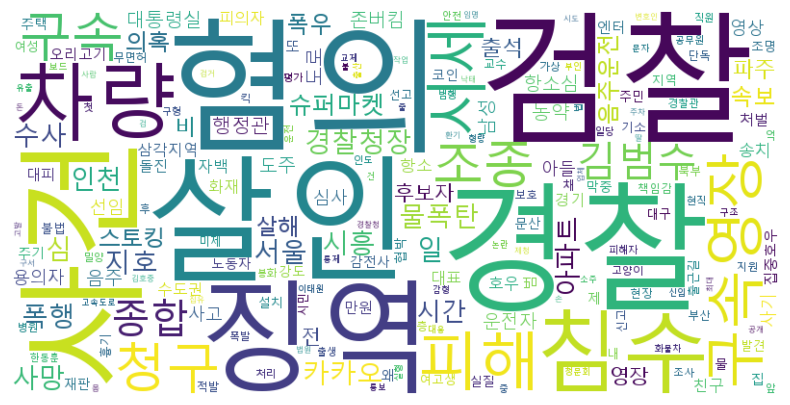

In [62]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드 클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

문제
* 근데 키워드들이 유의미하게 아직 뽑히지 않음.
* 그리고 키워드로 뽑은 기사의 수가 여전히 많음
* 너무 당연히 나오는 키워드들만 아직 뽑히는 듯
* 네이버 뉴스에서 카테고리말고 내가 키워드 입력해서 뉴스 크롤링하는 코드도 필요
* url = 'https://www.korea.kr/news/top50List.do' 여기것도